In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [4]:
df=pd.read_csv("../data/raw/players.csv")
df.head()

,avg_session_time,sessions_per_week,levels_completed,time_to_complete_level,death_rate,retry_rate,accuracy,exploration_score,aggression_score,completion_rate
0,24.483571,3.519347,11.231207,14.605391,3.662881,1.450595,46.108336,0.417521,0.200000,60.124993
1,21.308678,4.532739,3.159326,14.602969,4.173474,0.469670,56.972038,0.600000,0.200000,75.000000
2,25.238443,2.891240,4.607258,14.713460,3.181022,0.145797,58.985774,0.436748,0.339313,43.314007
3,29.615149,3.401712,12.973056,24.306992,1.703168,0.000000,64.121192,0.368647,0.445769,70.587285
4,20.829233,3.690144,10.683462,17.527742,3.399688,0.000000,67.644325,0.492180,0.200000,58.271983


In [5]:
X = df.values

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


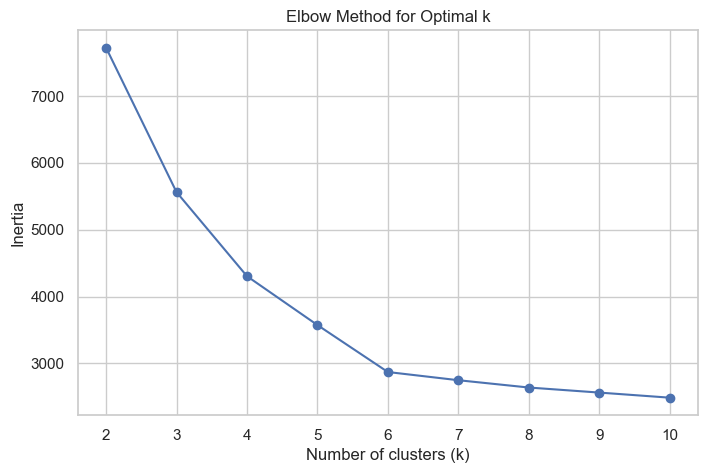

In [6]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [7]:
sil_scores = {}

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

sil_scores


{2: 0.3729175190917555,
 3: 0.36304008748885197,
 4: 0.38518140324307826,
 5: 0.4073226567531994,
 6: 0.41707779542862716,
 7: 0.3253483907627835,
 8: 0.2787044545970314,
 9: 0.27518640141401474,
 10: 0.24043864042485935}

In [10]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["cluster"] = clusters
df["cluster"].value_counts().sort_index()


cluster
0    180
1    240
2    360
3    180
4    120
5    120
Name: count, dtype: int64

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.42642931 0.2143171 ]
Total variance explained: 0.6407464088636139


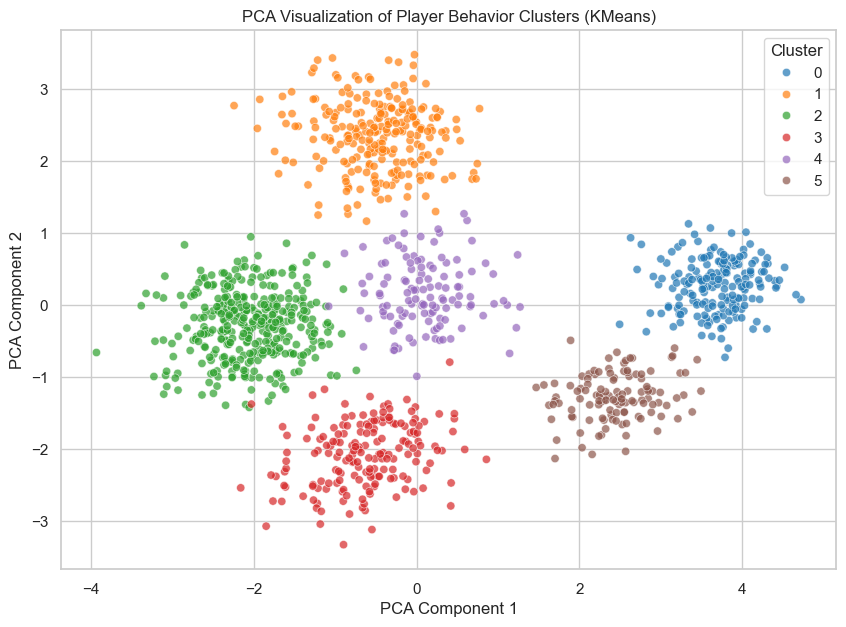

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df["cluster"],
    palette="tab10",
    alpha=0.7
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Player Behavior Clusters (KMeans)")
plt.legend(title="Cluster")
plt.show()


In [14]:
df["pca_1"] = X_pca[:, 0]
df["pca_2"] = X_pca[:, 1]


In [15]:
cluster_profiles = df.groupby("cluster").mean()
cluster_profiles


,avg_session_time,sessions_per_week,levels_completed,time_to_complete_level,death_rate,retry_rate,accuracy,exploration_score,aggression_score,completion_rate,pca_1,pca_2
cluster,,,,,,,,,,,,
0,89.826654,5.852932,44.810481,5.854443,0.519776,0.543452,89.858905,0.304140,0.695941,94.709923,3.690650,0.270363
1,69.900850,3.848638,22.302599,21.955060,1.948545,1.455956,68.186636,0.896723,0.302296,77.909500,-0.484022,2.350149
2,22.019494,2.977892,10.450739,16.371517,3.081453,0.530250,55.083801,0.403167,0.394564,60.289109,-2.058250,-0.290989
3,45.868572,3.905616,18.218942,12.017855,4.943043,2.001607,61.691499,0.306862,0.895942,59.771292,-0.631721,-2.079276
4,82.578776,5.001070,21.876252,16.560819,3.927594,3.970371,60.687370,0.506269,0.491911,74.199746,0.103083,0.161242
5,34.968381,5.154598,38.735108,4.572491,2.123040,3.006607,85.181225,0.107052,0.590586,90.201918,2.451319,-1.275203


In [21]:
## “I used KMeans clustering to segment players into six distinct behavioral
#  archetypes based on engagement, skill, exploration, and risk-taking patterns,
#  validated using silhouette score and PCA visualization.”

In [16]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan = DBSCAN(eps=1.2, min_samples=15)
db_label = dbscan.fit_predict(X_scaled)

df["dbscan_cluster"]= db_label
df["dbscan_cluster"].value_counts()

dbscan_cluster
-1    572
 0    284
 1    175
 2     74
 3     64
 4     17
 5     14
Name: count, dtype: int64

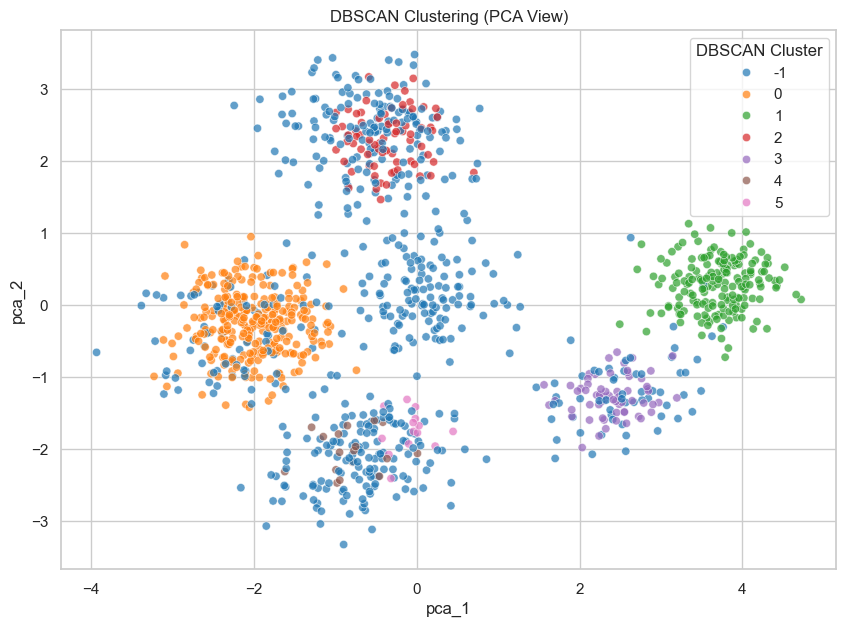

In [19]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df["pca_1"],
    y=df["pca_2"],
    hue=df["dbscan_cluster"],
    palette="tab10",
    alpha=0.7
)

plt.title("DBSCAN Clustering (PCA View)")
plt.legend(title="DBSCAN Cluster")
plt.show()


In [20]:
outliers = df[df["dbscan_cluster"] == -1]
outliers.describe()


,avg_session_time,sessions_per_week,levels_completed,time_to_complete_level,death_rate,retry_rate,accuracy,exploration_score,aggression_score,completion_rate,cluster,pca_1,pca_2,dbscan_cluster
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.0
mean,56.895624,4.106160,21.049627,15.759475,3.383639,2.188681,64.923568,0.512882,0.539768,71.103353,2.666084,-0.328807,-0.005151,-1.0
std,23.898481,1.327208,9.544001,7.067819,1.695177,1.417793,10.197337,0.280507,0.249597,13.665479,1.365847,1.330334,1.792776,0.0
min,10.000000,1.000000,2.000000,2.500000,0.000000,0.000000,40.000000,0.000000,0.100000,40.000000,0.000000,-3.930216,-3.329482,-1.0
25%,36.484613,3.097219,14.322778,10.979257,2.142660,1.087199,58.259739,0.300000,0.342634,62.000788,1.000000,-1.055720,-1.561769,-1.0
50%,56.265440,4.177724,19.780604,14.959575,3.337726,1.908443,63.697847,0.451536,0.490421,72.515712,3.000000,-0.424458,-0.115180,-1.0
75%,75.771582,5.039665,26.440109,19.921293,4.546991,3.284297,70.000000,0.838387,0.819636,80.866523,4.000000,0.153171,1.743016,-1.0
max,124.618744,7.000000,65.000000,35.000000,8.000000,7.000000,95.000000,1.000000,1.000000,98.579933,5.000000,3.762167,3.475476,-1.0


In [22]:
## “DBSCAN identified a small number of highly consistent player groups while labeling
#  A large portion of players as noise, indicating the presence of hybrid or transitional
#  behaviors not suited for density-based clustering.”

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram


In [7]:
sample = X_scaled[np.random.choice(len(X_scaled), size=300, replace=False)]
linked = linkage(sample, method="ward")


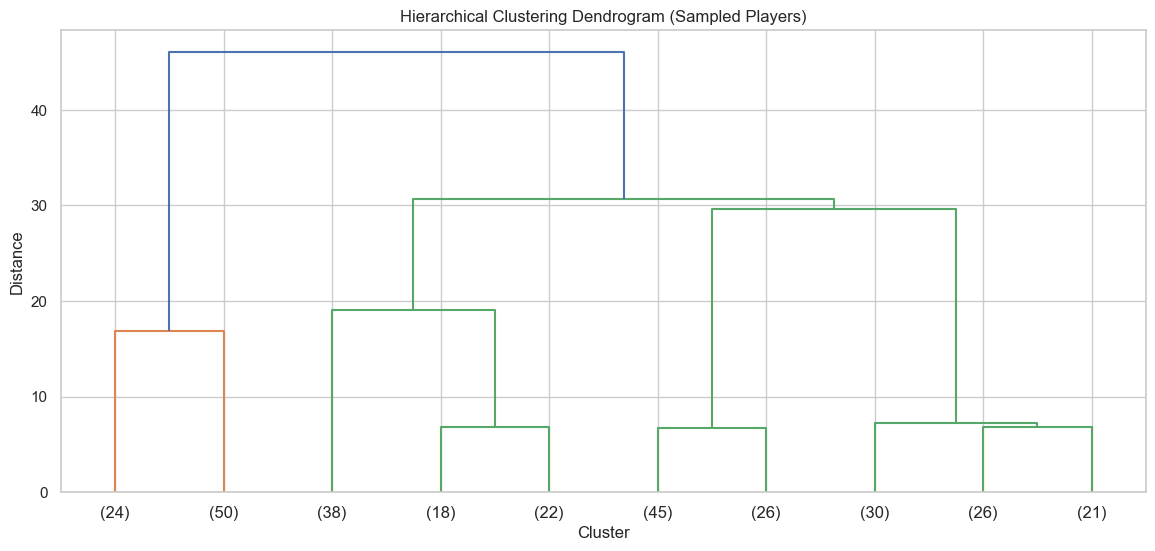

In [8]:
plt.figure(figsize=(14, 6))
dendrogram(
    linked,
    truncate_mode="lastp",
    p=10
)
plt.title("Hierarchical Clustering Dendrogram (Sampled Players)")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()


In [9]:
## “Hierarchical clustering revealed that certain player archetypes
#  such as hardcore and speedrunner players are behaviorally close,
#  while risk-taking players form a distinctly separate group that
#  only merges at high distances, indicating fundamentally different gameplay patterns.”

In [10]:
#“Player behavior is not binary but exists across multiple archetypes,
#  including casual, exploratory, mastery-driven, and risk-oriented play styles
# , with significant overlap and transitional behaviors between them.”